# Poverty & Improvement 
The following code generates the figures found in the essay *Poverty and Improvement: A case study in the application of process behavior charts outside of manufacturing*. The essay can be found [here](https://static1.squarespace.com/static/5b722db6f2e6b1ad5053391b/t/67a61be65845e420dcc8c0b3/1738939366795/Poverty+and+improvement.pdf).

Figure 3 is generated using the Python package `process_improvement.py`. This package can be found [here](https://pypi.org/project/process-improvement/). Package can be installed using `pip install process-improvement`.

In [34]:
# Import libraries
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Figure 5 is generated using xmr.xmrchart()
from process_improvement import xmr_charts as xmr

In [35]:
# Specify dataset_url
dataset_url = 'https://raw.githubusercontent.com/jimlehner/broken-quality-initiative/refs/heads/main/data/poverty_and_improvement-childhood_poverty_rates_2010_to_2023.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()
df.head()

,Population,Year,Anchored SPM Poverty Rate (2012) without Taxes and Transfers,Anchored SPM Poverty Rate (2012) with Taxes and Transfers,Historical SPM Poverty Rate without Taxes and Transfers,Historical SPM Poverty Rate
0,Children (< 18),2010,29.4,17.2,30.0,18.0
1,Children (< 18),2011,29.2,17.2,29.8,18.1
2,Children (< 18),2012,29.7,18.1,29.7,18.1
3,Children (< 18),2013,27.8,17.2,27.4,16.5
4,Children (< 18),2014,28.3,17.6,27.7,16.7


In [36]:
# Make 'Year' column astype string
df['Year'] = df['Year'].astype('string')
df.dtypes

Population                                                       object
Year                                                             string
Anchored SPM Poverty Rate (2012) without Taxes and Transfers    float64
Anchored SPM Poverty Rate (2012) with Taxes and Transfers       float64
Historical SPM Poverty Rate without Taxes and Transfers         float64
Historical SPM Poverty Rate                                     float64
dtype: object

## Fig 3: XmR Chart of childhood poverty rates

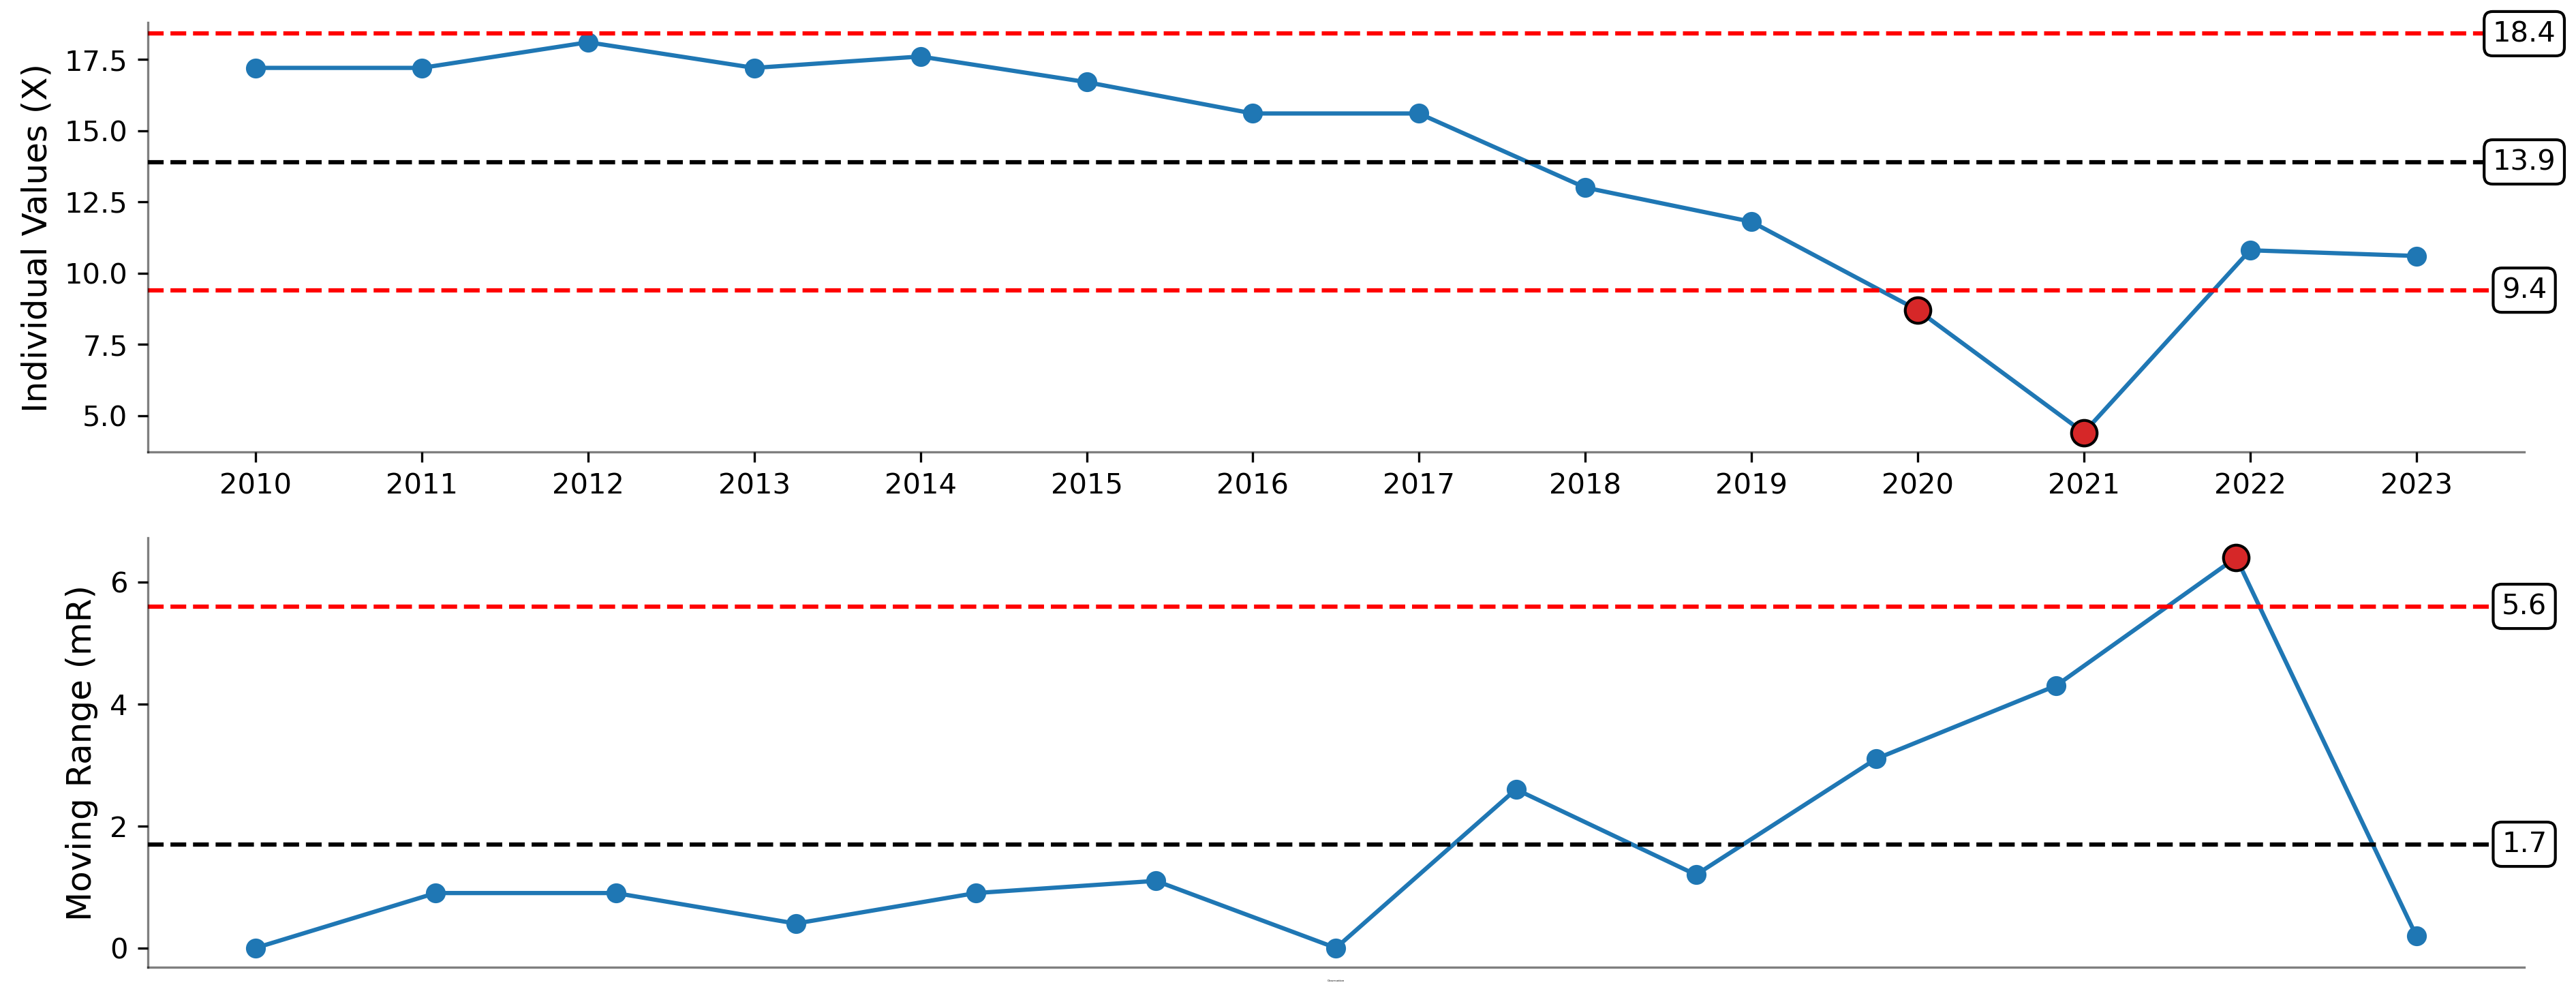

In [37]:
xmr_results = xmr.xmrchart(df, 'Anchored SPM Poverty Rate (2012) with Taxes and Transfers', 'Year', 
                           tickinterval=1, round_value=1)

## Fig 4: XmR Chart of childhood poverty rates with annotation

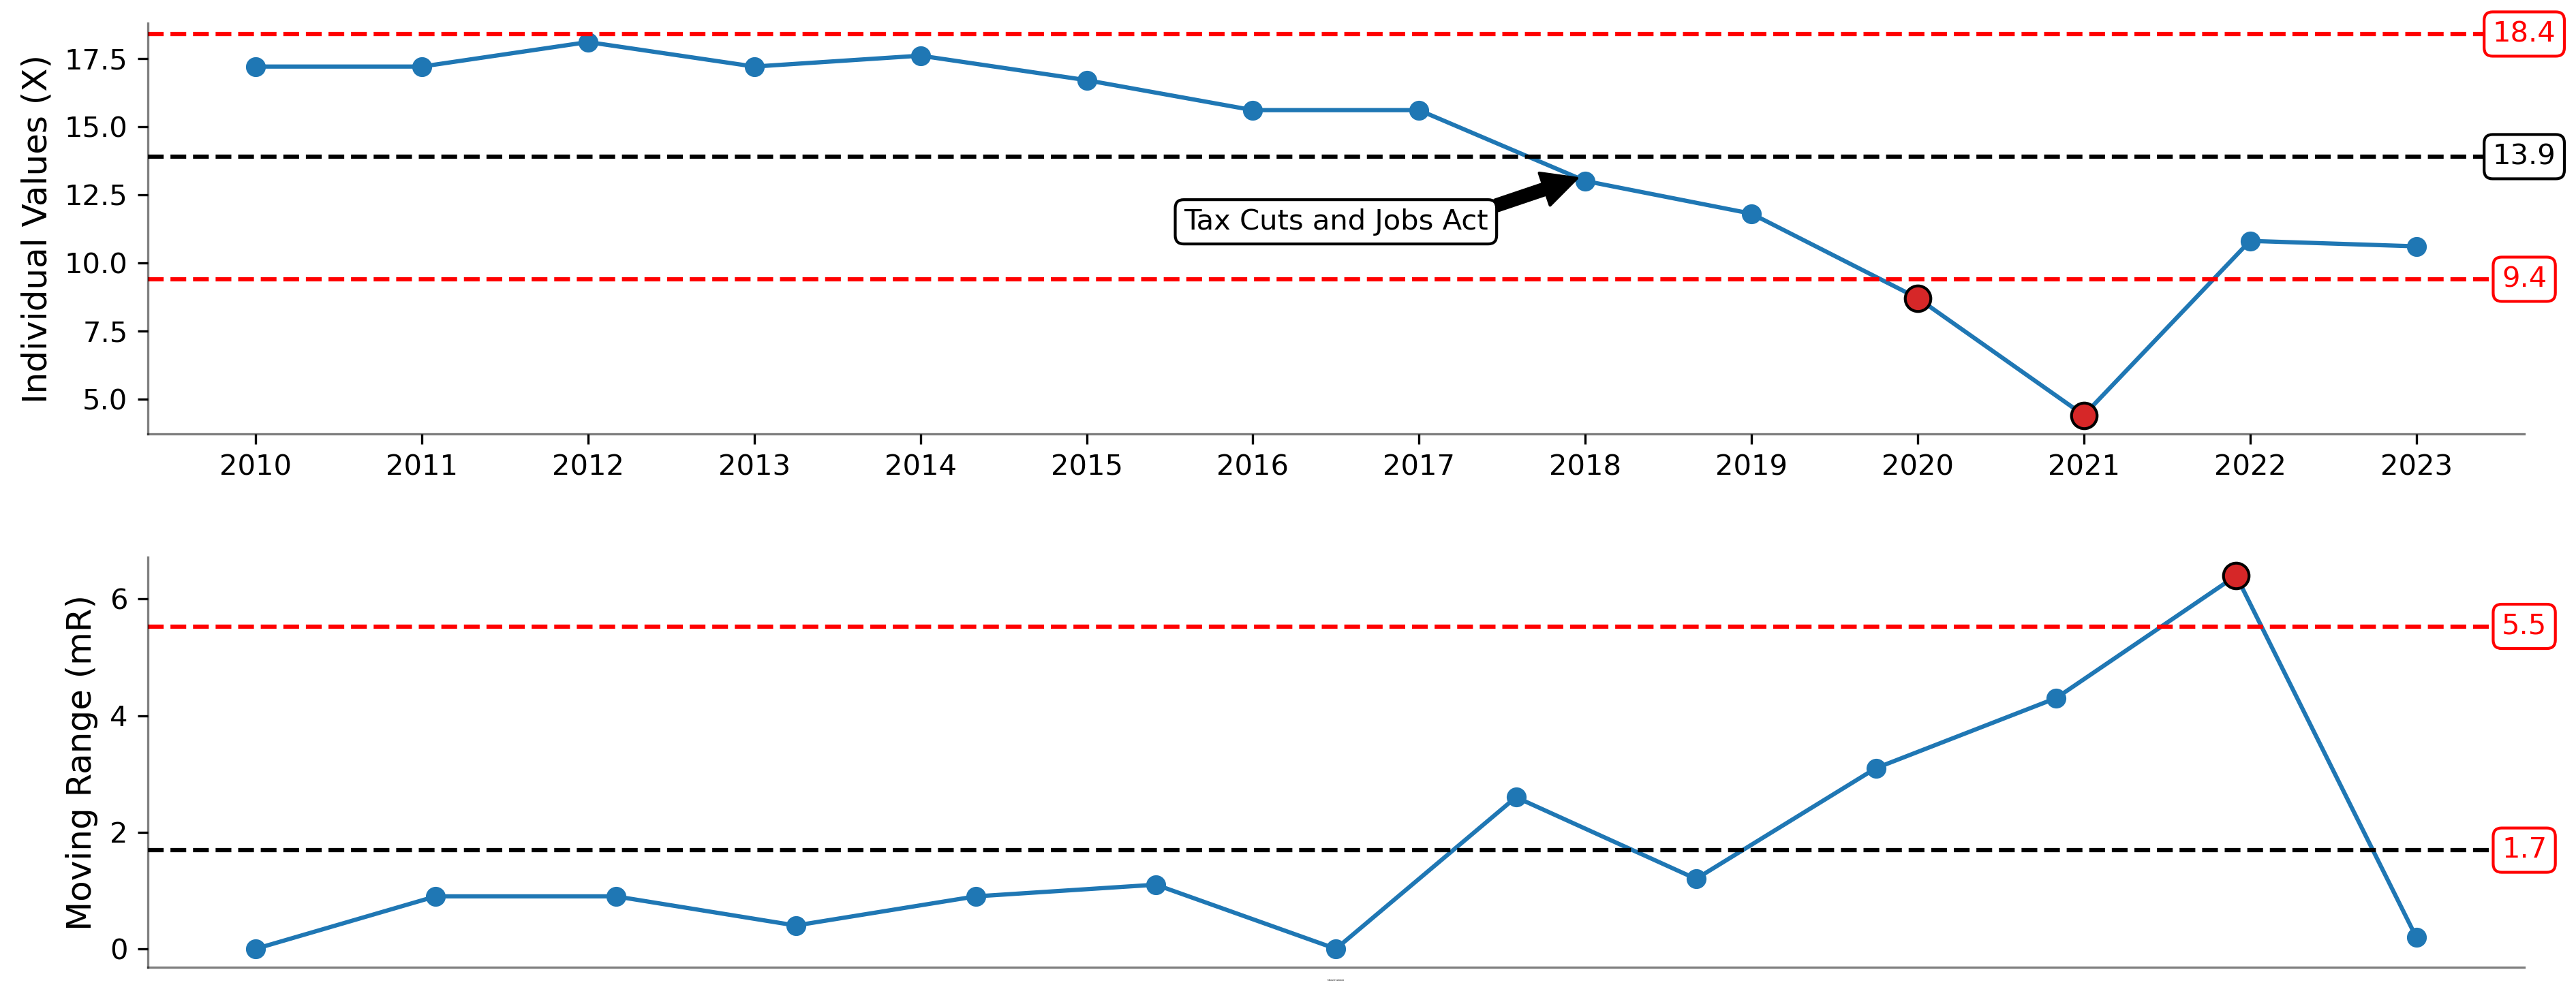

In [38]:
# Define reusable function for plotting lines and annotations
def plot_lines_and_annotations(ax, lines, labels, round_value, bbox_props, bbox_props_centerline):
    for value, color in lines:
        ax.axhline(value, ls='--', color=color)
    for y_value, label in labels:
        ax.text(ax.get_xlim()[1] * 1.0, y_value, round(y_value, round_value), color='red' if label != 'mean' else 'black',
                ha='center', va='center', bbox=bbox_props if label != 'mean' else bbox_props_centerline)

# Data preparation
data = df['Anchored SPM Poverty Rate (2012) with Taxes and Transfers']
moving_ranges = abs(data.diff())
labels = df['Year']

round_value = 1
tickinterval = 1

# Process calculations
mean = data.mean()
AmR = moving_ranges.mean()
C1, C2 = 2.660, 3.268
UPL = mean + (C1 * AmR)
LPL = max(mean - (C1 * AmR), 0)  # Ensure LPL isn't less than zero
URL = C2 * AmR

# Masking process limits
upper_lim = np.ma.masked_where(data < UPL, data)
lower_lim = np.ma.masked_where(data > LPL, data)
url_greater = np.ma.masked_where(moving_ranges <= URL, moving_ranges)
url_less = np.ma.masked_where(moving_ranges > URL, moving_ranges)

# Define line and label data
xchart_lines = [(mean, 'black'), (UPL, 'red'), (LPL, 'red')]
mrchart_lines = [(AmR, 'black'), (URL, 'red')]
xchart_labels = [(UPL, 'UPL'), (LPL, 'LPL'), (mean, 'mean')]
mrchart_labels = [(URL, 'URL'), (AmR, 'AmR')]

# Plotting the XmR-chart
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), dpi=300)
fig.subplots_adjust(hspace=0.3)

# Plot data for x-chart and mR-chart
axs[0].plot(labels, data, marker='o')
axs[1].plot(labels, moving_ranges, marker='o')

# Plotting process limit violations on x-chart and mR-chart
axs[0].plot(labels, lower_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)
axs[0].plot(labels, upper_lim, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)
axs[1].plot(labels, url_greater, marker='o', ls='none', color='tab:red', markeredgecolor='black', markersize=9)

# Add annotations and lines for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=1)
bbox_props_centerline = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

plot_lines_and_annotations(axs[0], xchart_lines, xchart_labels, round_value, bbox_props, bbox_props_centerline)
plot_lines_and_annotations(axs[1], mrchart_lines, mrchart_labels, round_value, bbox_props, bbox_props_centerline)

# Specify spine visibility
for ax in axs:
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_alpha(0.5)

# Configure axis labels
axs[0].set_ylabel('Individual Values (X)', fontsize=12)
axs[1].set_xlabel('Observation', fontsize=0)
axs[1].set_ylabel('Moving Range (mR)', fontsize=12)
axs[1].set_xticks([])

# X-axis ticks for x-chart
tick_positions = np.arange(0, len(labels), tickinterval)
axs[0].set_xticks(tick_positions)
axs[0].set_xticklabels(labels.iloc[tick_positions], ha='center')

# Annotations for events (place these as required)
axs[0].annotate('Tax Cuts and Jobs Act', xy=(7.95, 13.1), xytext=(6.5, 11.5), ha='center', va='center', arrowprops=dict(facecolor='black'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].annotate('Assignable Cause', xy=(20, 8.6), xytext=(18.5, 6.5), ha='center', va='center', zorder=13, arrowprops=dict(facecolor='black'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Show XmR chart
plt.show()

## Fig 5: Time series of childhood poverty rates from 1967 to 2023
Figure 5 uses a different dataset than the previous figures

In [56]:
# Establish dataset URL
dataset_URL_2 = r'https://raw.githubusercontent.com/jimlehner/broken-quality-initiative/refs/heads/main/data/poverty_and_improvement-childhood_poverty_rates_1967_to_2023%20-%20anchored-SPM-childhood-poverty-rates-with-tax-transfer-1967-to-2023.csv'

# Get data
def get_data(dataset_URL_2) -> pd.DataFrame:
    return pd.read_csv(dataset_URL_2)

# Get data
df2 = get_data(dataset_URL_2)

# Specify Dtypes
df2['Year'] = df2['Year'].astype('string')

# Show dataframe
df2.head()

,Type,Year,Anchored SPM Poverty Rate (2012) without Taxes and Transfers,Anchored SPM Poverty Rate (2012) with Taxes and Transfers
0,Children (< 18),1967,28.4,29.8
1,Children (< 18),1968,26.3,27.5
2,Children (< 18),1969,24.7,26.2
3,Children (< 18),1970,25.4,26.1
4,Children (< 18),1971,27.4,26.9


In [57]:
# Make 'Year' column dtype string
df2['Year'] = df2['Year'].astype('string')
df2.dtypes

Type                                                             object
Year                                                             string
Anchored SPM Poverty Rate (2012) without Taxes and Transfers    float64
Anchored SPM Poverty Rate (2012) with Taxes and Transfers       float64
dtype: object

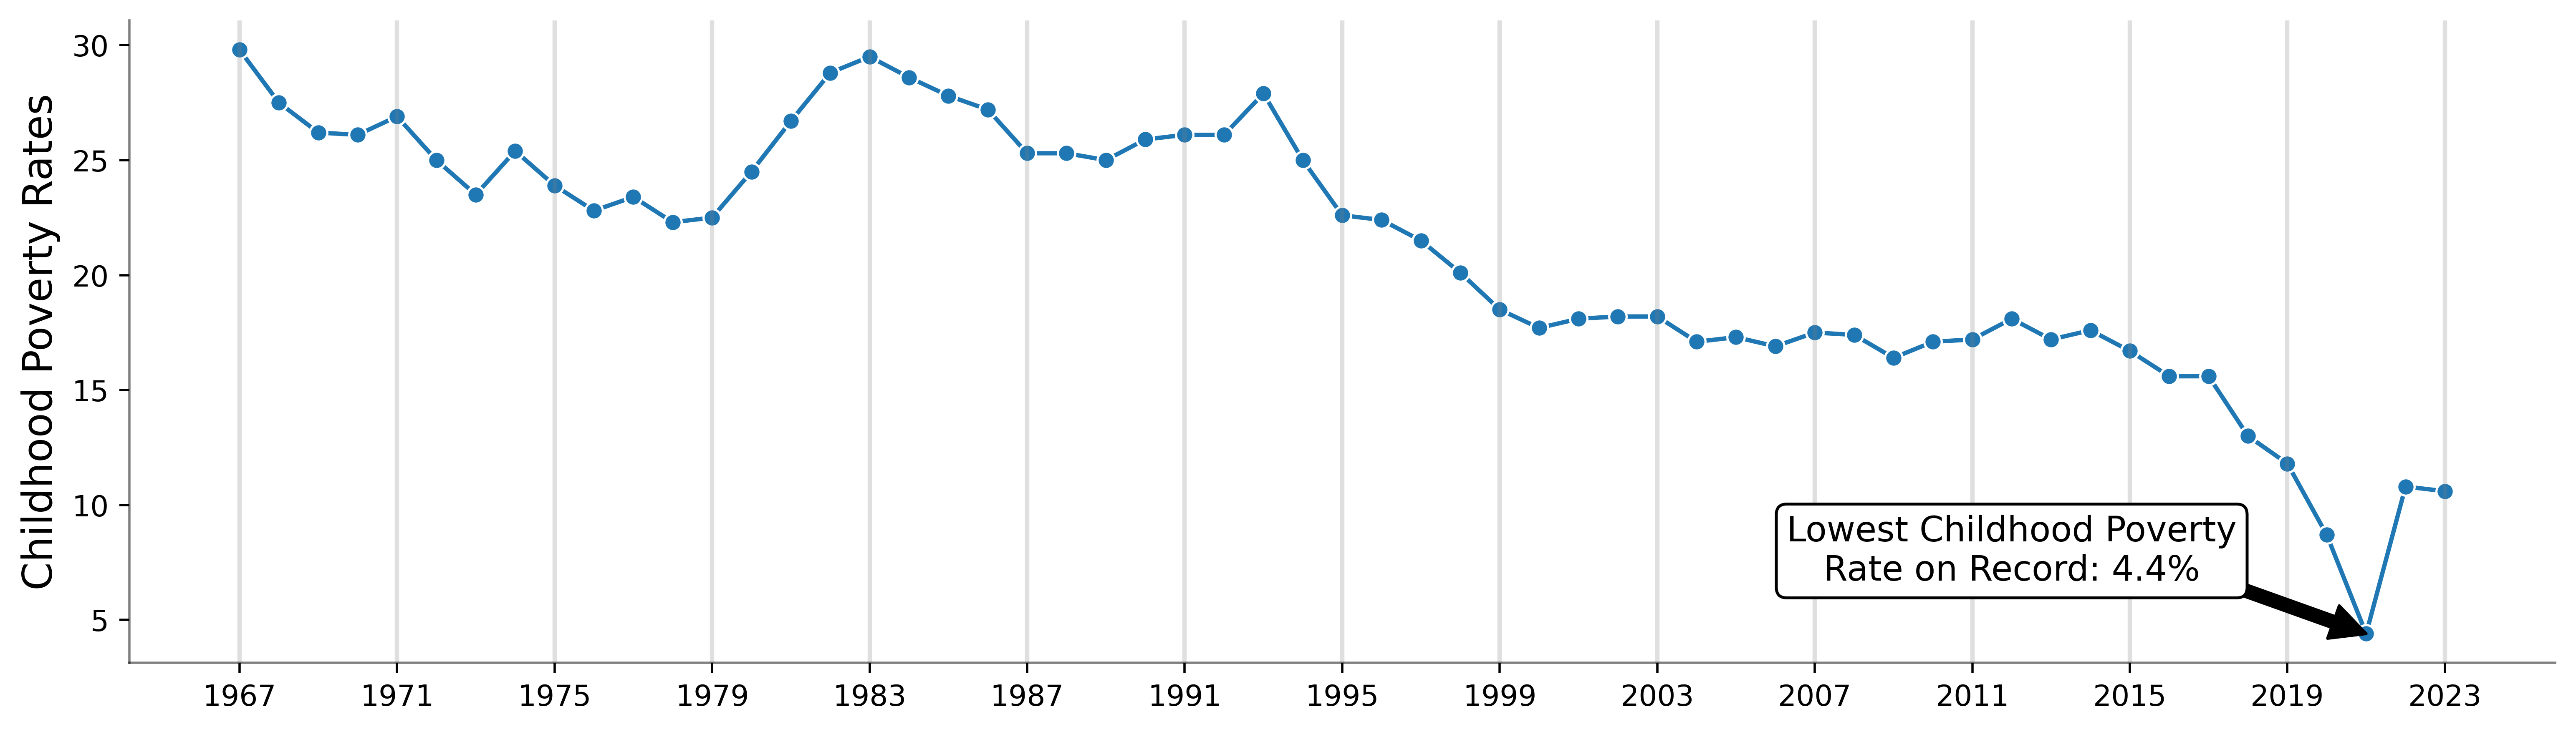

In [58]:
# Specify column used for labels
labels = df2['Year']

# Create figure and axis
fig, ax = plt.subplots(figsize=(15,4), dpi=500)

# Plot data
sns.lineplot(df2, x='Year', y='Anchored SPM Poverty Rate (2012) with Taxes and Transfers', marker='o')

ax.annotate('Lowest Childhood Poverty\nRate on Record: 4.4%',
            xy=(54, 4.4), 
            xytext=(45, 8),
            fontsize=12, 
            color='black', 
            ha='center',
            va='center',
            arrowprops=dict(facecolor='black'),
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Specify the display of the tick intervals on the x-axis
tick_positions = np.arange(0, len(labels), 4)
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels.iloc[tick_positions], rotation=0, ha='center')

# Add vertical lines at the xticks positions
for pos in tick_positions:
    ax.axvline(x=pos, color='gray', linestyle='-', alpha=0.25)

sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

ax.set_ylabel('Childhood Poverty Rates', fontsize=14)
ax.set_xlabel('')

plt.show()